In [2]:
#Importing libraries and data
import pandas as pd
pumpkins = pd.read_csv(r'C:\Users\ryant\OneDrive\Documents\US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
#Checking for missing data in the DataFrame
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
#Selecting only the columns of interest
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [5]:
#Calculating the average of the lowest and highest prices and converting the data column to show only the month
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [6]:
print(month)

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)


In [7]:
#Creating a new Pandas DataFrame with this altered data
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})


In [8]:
#Taking a look at the new DataFrame
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [9]:
#Adding filters to account for the pumpkins being recorded in different measurements in the 'Package' variable
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [10]:
#Importing matplotlib for visualisation
import matplotlib.pyplot as plt

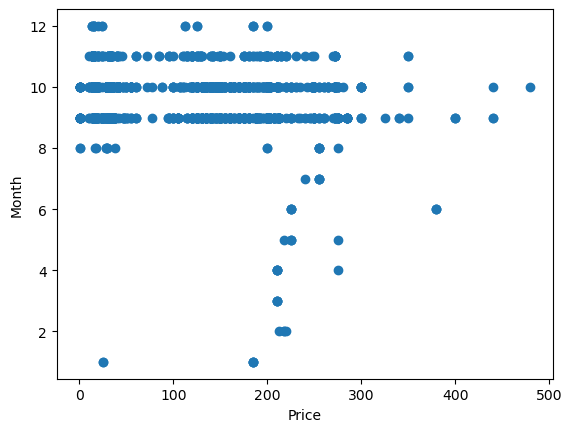

In [13]:
#Creating a scatter plot of month against price
#This plot is not particularly useful, this portion is used to show that there is a better and more informative
#way of visualising this data
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.show()

Text(0, 0.5, 'Pumpkin Price')

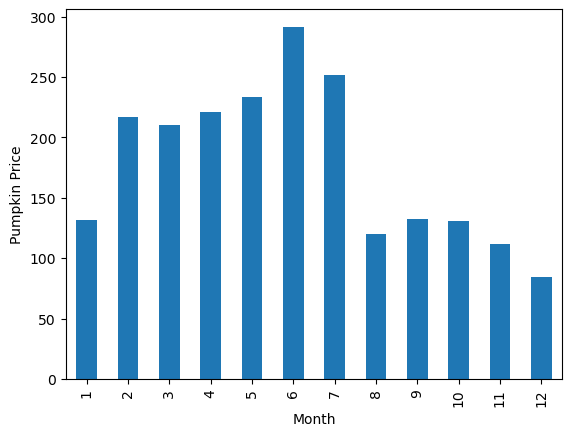

In [14]:
#Using the groupby, mean, and plot methods within Pandas to create a histogram of the mean price of pumpkins in each month
#This plot is significantly more informative than the previous one
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

Text(0, 0.5, 'Pumpkin Price')

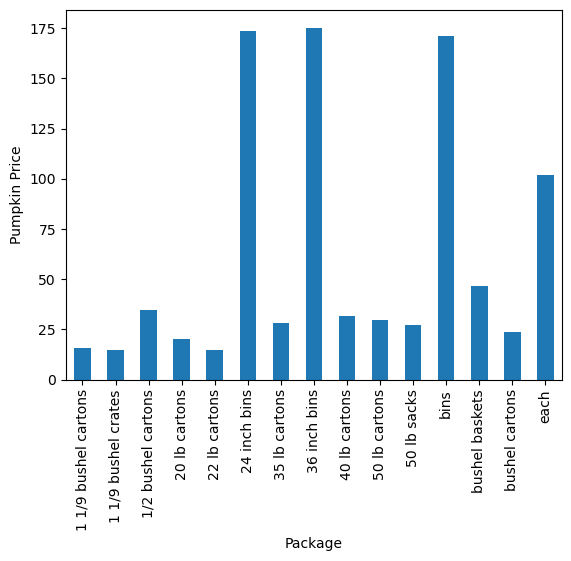

In [15]:
#Doing the same as above but with 'package'
new_pumpkins.groupby(['Package'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [16]:
#Importing seaborn to try new visualisations
import seaborn as sb

<Axes: xlabel='Month', ylabel='Count'>

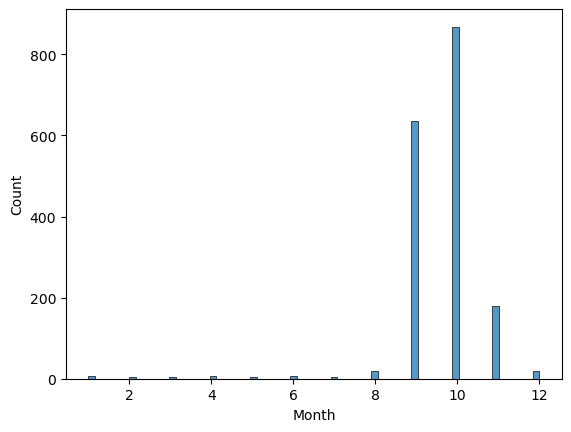

In [18]:
#Creating a histogram of the count of the month variable, clearly more pumpkins sold in the autumn
sb.histplot(new_pumpkins, x="Month")

<Axes: xlabel='Price', ylabel='Count'>

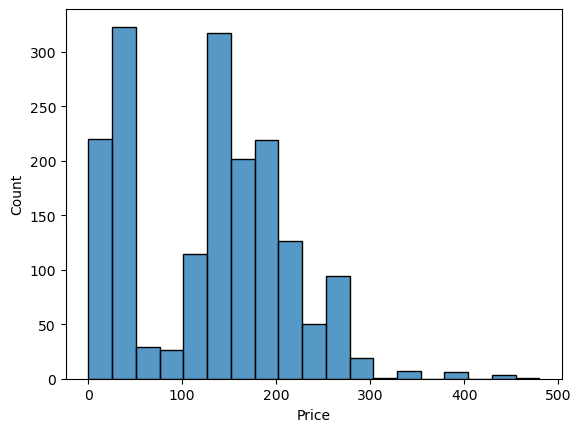

In [19]:
#Doing the same with the price variable, strange distribution; almost as if it is two different distributions joined together
#Likely, pumpkins sold in small sizes are sold for inflated prices
sb.histplot(new_pumpkins, x="Price")

<Axes: xlabel='Month', ylabel='Price'>

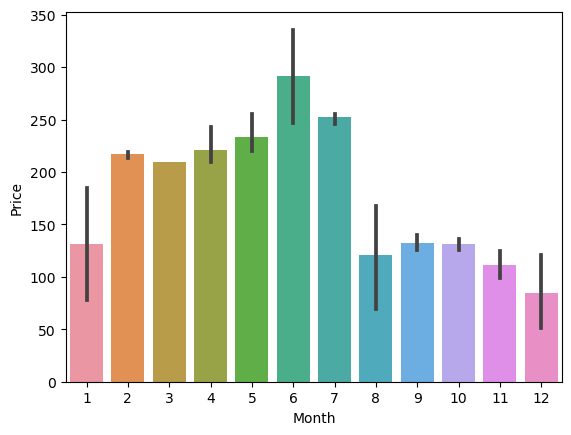

In [20]:
#Creating a barchart of price against month, this barchart also includes error bars which carry statistical importance
sb.barplot(new_pumpkins, x="Month", y="Price")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '24 inch bins'),
  Text(1, 0, '36 inch bins'),
  Text(2, 0, '50 lb sacks'),
  Text(3, 0, '1 1/9 bushel cartons'),
  Text(4, 0, '1/2 bushel cartons'),
  Text(5, 0, '1 1/9 bushel crates'),
  Text(6, 0, 'bushel cartons'),
  Text(7, 0, 'bins'),
  Text(8, 0, '35 lb cartons'),
  Text(9, 0, 'each'),
  Text(10, 0, '20 lb cartons'),
  Text(11, 0, '50 lb cartons'),
  Text(12, 0, '40 lb cartons'),
  Text(13, 0, 'bushel baskets'),
  Text(14, 0, '22 lb cartons')])

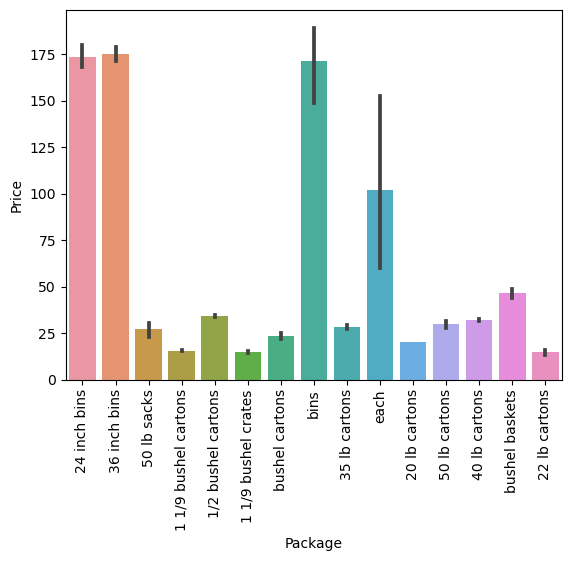

In [24]:
#Doing the same nut for 'package'
sb.barplot(new_pumpkins, x="Package", y="Price")
plt.xticks(rotation=90)